In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import IsolationForest

In [4]:
df = pd.read_csv("/home/user02/Documents/fences/grid_side_model/kerala_illegal_fence_detection_dataset.csv")
print(df.head())
print(df.info())
print(df['illegal_fence_suspected'].value_counts())

   area_id   district       city   area_name   latitude  longitude  \
0  KL_0000  Kozhikode  Kozhikode  Kallathara  11.322288  76.231557   
1  KL_0000  Kozhikode  Kozhikode  Kallathara  11.322288  76.231557   
2  KL_0000  Kozhikode  Kozhikode  Kallathara  11.322288  76.231557   
3  KL_0000  Kozhikode  Kozhikode  Kallathara  11.322288  76.231557   
4  KL_0000  Kozhikode  Kozhikode  Kallathara  11.322288  76.231557   

    area_type  households  distance_to_substation_km  local_incident_reports  \
0  semi-urban          35                       3.56                   False   
1  semi-urban          35                       3.56                   False   
2  semi-urban          35                       3.56                   False   
3  semi-urban          35                       3.56                   False   
4  semi-urban          35                       3.56                   False   

   ...  voltage_reading_v  current_reading_a consumption_deviation_pct  \
0  ...              220.

In [17]:
a=df.columns
print(a)


Index(['latitude', 'longitude', 'households', 'distance_to_substation_km',
       'local_incident_reports', 'year', 'month', 'expected_consumption_kwh',
       'actual_consumption_kwh', 'voltage_reading_v',
       ...
       'timestamp_2024-03-01', 'timestamp_2024-04-01', 'timestamp_2024-05-01',
       'timestamp_2024-06-01', 'timestamp_2024-07-01', 'timestamp_2024-08-01',
       'timestamp_2024-09-01', 'timestamp_2024-10-01', 'timestamp_2024-11-01',
       'timestamp_2024-12-01'],
      dtype='object', length=693)


In [8]:
cat_cols = df.select_dtypes(include=['object']).columns

In [9]:
#0-1 encoding the catg. data
encoder = OneHotEncoder(sparse_output=False, drop='first')
# Fit and transform the categorical columns
encoded_cat = pd.DataFrame(
    encoder.fit_transform(df[cat_cols]),columns=encoder.get_feature_names_out(cat_cols),index=df.index)
df = pd.concat([df.drop(columns=cat_cols), encoded_cat], axis=1)

In [13]:
df.columns

Index(['latitude', 'longitude', 'households', 'distance_to_substation_km',
       'local_incident_reports', 'year', 'month', 'expected_consumption_kwh',
       'actual_consumption_kwh', 'voltage_reading_v',
       ...
       'timestamp_2024-03-01', 'timestamp_2024-04-01', 'timestamp_2024-05-01',
       'timestamp_2024-06-01', 'timestamp_2024-07-01', 'timestamp_2024-08-01',
       'timestamp_2024-09-01', 'timestamp_2024-10-01', 'timestamp_2024-11-01',
       'timestamp_2024-12-01'],
      dtype='object', length=693)

In [18]:

exclude_cols = [
    'area_id', 'timestamp', 'year', 'month',  
    'is_summer', 'is_monsoon', 'is_winter',  
    'illegal_fence_suspected'          
]

num_features = df.select_dtypes(include=['int64', 'float64']).columns
num_features = [col for col in num_features if col not in exclude_cols]

scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])


In [20]:
df

,latitude,longitude,households,distance_to_substation_km,local_incident_reports,year,month,expected_consumption_kwh,actual_consumption_kwh,voltage_reading_v,...,timestamp_2024-03-01,timestamp_2024-04-01,timestamp_2024-05-01,timestamp_2024-06-01,timestamp_2024-07-01,timestamp_2024-08-01,timestamp_2024-09-01,timestamp_2024-10-01,timestamp_2024-11-01,timestamp_2024-12-01
0,0.836867,-0.204485,-1.278110,-1.097246,False,2023,1,-0.801986,-0.801826,-0.685617,...,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514
1,0.836867,-0.204485,-1.278110,-1.097246,False,2023,2,-0.945070,-0.940737,0.129905,...,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514
2,0.836867,-0.204485,-1.278110,-1.097246,False,2023,3,-0.804302,-0.804074,0.570727,...,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514
3,0.836867,-0.204485,-1.278110,-1.097246,False,2023,4,-0.808167,-0.807826,1.672784,...,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514
4,0.836867,-0.204485,-1.278110,-1.097246,False,2023,5,-0.602500,-0.608156,1.088694,...,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,-1.729392,1.095523,-0.224149,-1.201238,True,2024,8,-0.162821,-0.181298,1.970339,...,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,4.795832,-0.208514,-0.208514,-0.208514,-0.208514
9596,-1.729392,1.095523,-0.224149,-1.201238,True,2024,9,0.491418,0.453863,0.273172,...,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,4.795832,-0.208514,-0.208514,-0.208514
9597,-1.729392,1.095523,-0.224149,-1.201238,True,2024,10,-0.015828,-0.038592,-0.189691,...,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,4.795832,-0.208514,-0.208514
9598,-1.729392,1.095523,-0.224149,-1.201238,True,2024,11,-0.152598,-0.171373,-0.476226,...,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,4.795832,-0.208514


In [22]:
area_df=pd.read_csv("/home/user02/Documents/fences/grid_side_model/kerala_illegal_fence_detection_dataset.csv")
areas = area_df['area_name'].unique()
print(areas)

['Kallathara' 'Cheravayal' 'Pettathara' 'Kodumukku' 'Padamkunnu'
 'Vattakavu' 'Melapara' 'Thekkevayal' 'Idavanagar' 'Melamoodu'
 'Kallanagar' 'Kottapuram' 'Idavamoodu' 'Vattamoodu' 'Puzhaveli'
 'Kottanagar' 'Cheramoodu' 'Thoduvayal' 'Vattanagar' 'Vellinagar'
 'Vattamukku' 'Vadakkemukku' 'Pallipuram' 'Kottapara' 'Vellipara'
 'Kizhakkunnu' 'Idavapara' 'Pettapuram' 'Padamnagar' 'Kizhakpara'
 'Manjapuram' 'Thoduthara' 'Kizhakvayal' 'Manjakavu' 'Thekkethara'
 'Muthakavu' 'Cherapara' 'Thodukunnu' 'Nallamukku' 'Muthakunnu'
 'Idavamukku' 'Kottamukku' 'Melaveli' 'Padampuram' 'Pallivayal'
 'Manamoodu' 'Kallamoodu' 'Nallakunnu' 'Kizhakmoodu' 'Pettapara'
 'Manavayal' 'Kizhakmukku' 'Vadakkekavu' 'Cherathara' 'Kottathara'
 'Kottakavu' 'Thodupuram' 'Pettamukku' 'Manjamoodu' 'Manjakunnu'
 'Vadakkethara' 'Kottakunnu' 'Thekkeveli' 'Puzhavayal' 'Vellithara'
 'Puzhathara' 'Idavapuram' 'Puzhamukku' 'Mananagar' 'Pettakunnu'
 'Vadakkepuram' 'Koduveli' 'Padamveli' 'Pallimukku' 'Manathara'
 'Nallapara' 'Vellip

In [24]:
# Add area_name from area_df to your processed df
df['area_name'] = area_df['area_name'].values


/tmp/ipykernel_518561/750329256.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['area_name'] = area_df['area_name'].values


In [25]:

areas = df['area_name'].unique()
train_areas, temp_areas = train_test_split(areas, test_size=0.3, random_state=42)#70 -30 for train and test
val_areas, test_areas = train_test_split(temp_areas, test_size=0.5, random_state=42)#15-15 for val and test

train_df = df[df['area_name'].isin(train_areas)]
val_df = df[df['area_name'].isin(val_areas)]
test_df = df[df['area_name'].isin(test_areas)]


In [46]:
# illegal_fence_suspected ismytarget

cols_to_drop = ['illegal_fence_suspected', 'area_name', 'actual_consumption_kwh',
    'consumption_deviation_pct',
    'consumption_per_household']  

cols_to_drop += [col for col in df.columns if col.startswith('area_') or col.startswith('city_') or col.startswith('district_')]

X_train = train_df.drop(columns=cols_to_drop)
y_train = train_df['illegal_fence_suspected']

X_val = val_df.drop(columns=cols_to_drop)
y_val = val_df['illegal_fence_suspected']

X_test = test_df.drop(columns=cols_to_drop)
y_test = test_df['illegal_fence_suspected']



In [47]:
print(len(X_train))

6480


In [48]:
print(len(X_val))
print(len(X_test))

1704
1416


In [30]:
import joblib

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']  
}


In [73]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())


Before SMOTE: illegal_fence_suspected
False    6241
True      239
Name: count, dtype: int64
After SMOTE: illegal_fence_suspected
False    6241
True     6241
Name: count, dtype: int64


In [74]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',        # good for imbalanced classification
    cv=3,             
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_resampled, y_train_resampled)



Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20

/home/user02/gpuenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
41 fits failed with the following error:
Traceback (most recent call last):
  File "/home/user02/gpuenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/user02/gpuenv/lib/python3.10/site-packages/sklearn/base.py", line 1358, in wrapper
    estimator._validate_params()
  File "/home/user02/gpuenv/lib/python3.10/site-packages/sklearn/base.py", line 471, in _validate_params
    validate_parameter_constraints(
  File "/home/user02/gpuen

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [10, 20, ...], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [75]:

print("Best parameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [76]:
y_val_pred = best_model.predict(X_val)
y_test_pred = best_model.predict(X_test)

In [77]:
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

Validation Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.99      0.95      1542
        True       0.57      0.19      0.29       162

    accuracy                           0.91      1704
   macro avg       0.75      0.59      0.62      1704
weighted avg       0.89      0.91      0.89      1704



In [78]:
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

Validation Confusion Matrix:
[[1519   23]
 [ 131   31]]


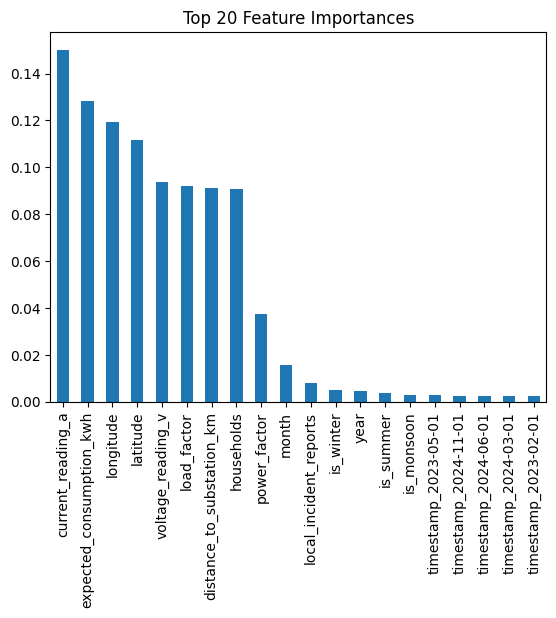

In [54]:
# Feature importance plot
import matplotlib.pyplot as plt

feat_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='bar')
plt.title('Top 20 Feature Importances')
plt.show()

In [58]:
joblib.dump(best_model, 'best_random_forest_model_version2.joblib')
print("Best Random Forest model saved as 'best_random_forest_model_version.joblib'")

Best Random Forest model saved as 'best_random_forest_model_version.joblib'


In [59]:
val_predictions_df = val_df[['area_name']].copy()
val_predictions_df['predicted_label'] = y_val_pred
val_predictions_df['true_label'] = y_val.values
val_predictions_df.to_csv('val_predictions_with_area.csv', index=False)
print("Validation predictions saved to 'val_predictions_with_area.csv'")

Validation predictions saved to 'val_predictions_with_area.csv'


In [60]:
test_predictions_df = test_df[['area_name']].copy()
test_predictions_df['predicted_label'] = y_test_pred
test_predictions_df['true_label'] = y_test.values
test_predictions_df.to_csv('test_predictions_with_area.csv', index=False)
print("Test predictions saved to 'test_predictions_with_area_.csv'")

Test predictions saved to 'test_predictions_with_area_.csv'


In [ ]:
XG-BOOST

In [81]:
import xgboost as xgb


dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dval = xgb.DMatrix(X_val, label=y_val) 




In [82]:
xgb_model = xgb.XGBClassifier(
    tree_method='gpu_hist',  # Use GPU accelerated algorithm
    predictor='gpu_predictor',
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1
)

In [83]:
# 3. Hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5]
}

In [85]:
# 4. Randomized Search (faster than GridSearch)

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,              
    scoring='f1',       
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [86]:
# 5. Fit model on resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/si

[CV] END colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   3.9s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=300, subsample=1; total time=   4.1s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:19:12] WARNING: /workspace/src/common/error_msg.cc:27: The t

[CV] END colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   6.9s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:19:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpu

[CV] END colsample_bytree=1, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   4.2s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_meth

[CV] END colsample_bytree=1, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   4.8s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_meth

[CV] END colsample_bytree=1, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   4.2s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/si

[CV] END colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8; total time=  16.1s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:19:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpu

[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.7; total time=  27.3s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:19:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpu

[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.7; total time=  27.7s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:19:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [22:19:35] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.p

[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.7; total time=  27.9s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:19:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpu

[CV] END colsample_bytree=1, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8; total time=  16.2s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:19:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [22:19:42] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8; total time=  34.9s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:19:44] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8; total time=  29.7s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:44] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:19:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpu

[CV] END colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.7; total time=  38.8s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:19:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpu

[CV] END colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1; total time=  39.6s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:19:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpu

[CV] END colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.7; total time=  40.0s
[CV] END colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1; total time=  39.5s
[CV] END colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1; total time=  39.7s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/si

[CV] END colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=100, subsample=0.8; total time=  40.8s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:19:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [22:19:48] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.p

[CV] END colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=100, subsample=0.8; total time=  41.0s
[CV] END colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=100, subsample=0.8; total time=  40.7s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/si

[CV] END colsample_bytree=0.8, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.7; total time=  41.6s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:19:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpu

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1; total time=  42.9s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:19:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpu

[CV] END colsample_bytree=1, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8; total time=  16.4s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:19:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [22:19:51] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data str

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1; total time=  44.1s
[CV] END colsample_bytree=0.8, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.7; total time=  44.0s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:19:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [22:19:51] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:26

[CV] END colsample_bytree=1, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8; total time=  16.1s
[CV] END colsample_bytree=0.8, gamma=5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.7; total time=  44.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1; total time=  43.8s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/si

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8; total time=  37.7s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:19:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpu

[CV] END colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=300, subsample=0.7; total time=  51.6s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:19:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:19:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpu

[CV] END colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=300, subsample=0.7; total time=  52.1s
[CV] END colsample_bytree=0.7, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=300, subsample=0.7; total time=  51.8s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:20:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:20:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpu

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8; total time=  42.1s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:20:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:20:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpu

[CV] END colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=200, subsample=1; total time=  55.5s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:20:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:20:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpu

[CV] END colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=200, subsample=1; total time=  55.6s
[CV] END colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=200, subsample=1; total time=  55.6s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:20:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:20:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:20:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/si

[CV] END colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=  27.8s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:20:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:20:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[CV] END colsample_bytree=0.8, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8; total time=  16.4s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:20:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:20:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpu

[CV] END colsample_bytree=0.8, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8; total time=  16.4s
[CV] END colsample_bytree=0.8, gamma=5, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8; total time=  16.4s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:20:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:20:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:20:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/si

[CV] END colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=  27.8s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:20:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:20:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpu

[CV] END colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=300, subsample=0.8; total time= 1.0min
[CV] END colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=300, subsample=0.8; total time= 1.0min
[CV] END colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=300, subsample=0.8; total time= 1.0min


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:20:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:20:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:20:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/si

[CV] END colsample_bytree=1, gamma=1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=  27.7s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[CV] END colsample_bytree=1, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1; total time=  14.1s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:20:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:20:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[CV] END colsample_bytree=1, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1; total time=  14.1s
[CV] END colsample_bytree=1, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1; total time=  14.1s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:20:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:20:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/user02/gpu

[CV] END colsample_bytree=1, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, subsample=0.8; total time=  26.2s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[CV] END colsample_bytree=1, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, subsample=0.8; total time=  26.5s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[CV] END colsample_bytree=1, gamma=5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, subsample=0.8; total time=  26.7s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[CV] END colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1; total time=  35.0s
[CV] END colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1; total time=  35.2s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[CV] END colsample_bytree=1, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=1; total time=  35.2s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[CV] END colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.7; total time=  17.1s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, subsample=0.7; total time=  43.3s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, subsample=0.7; total time=  43.0s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, subsample=0.7; total time=  42.3s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[CV] END colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.7; total time=  16.2s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[CV] END colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.7; total time=  16.1s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[CV] END colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.7; total time=  38.7s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.7; total time=  38.7s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [22:20:31] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:26

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.7; total time= 1.4min
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.7; total time=  38.2s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [22:20:31] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:26

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.7; total time= 1.4min
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.7; total time= 1.4min


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[CV] END colsample_bytree=0.8, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8; total time=  32.4s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[CV] END colsample_bytree=0.8, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8; total time=  30.3s
[CV] END colsample_bytree=0.8, gamma=5, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8; total time=  31.1s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[CV] END colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, subsample=1; total time=  45.0s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[CV] END colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, subsample=1; total time=  44.3s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[CV] END colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, subsample=1; total time=  44.0s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [22:20:36] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, subsample=0.8; total time= 1.5min
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, subsample=0.8; total time= 1.5min


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [22:20:36] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:26

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=300, subsample=0.8; total time= 1.5min
[CV] END colsample_bytree=0.8, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, subsample=0.7; total time=  28.6s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` paramet

[CV] END colsample_bytree=0.8, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, subsample=0.7; total time=  28.7s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1; total time=  31.9s
[CV] END colsample_bytree=0.8, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, subsample=0.7; total time=  28.8s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1; total time=  32.0s
[CV] END colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=300, subsample=1; total time= 1.5min


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [22:20:37] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:26

[CV] END colsample_bytree=1, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=300, subsample=1; total time= 1.5min
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, subsample=1; total time=  30.3s


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [22:20:38] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory

[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=300, subsample=0.8; total time= 1.5min
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=300, subsample=0.8; total time= 1.5min
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=300, subsample=0.8; total time= 1.5min


/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:20:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` paramet

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=300, subsample=0.8; total time=  35.8s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=300, subsample=0.8; total time=  35.3s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=300, subsample=0.8; total time=  34.4s


,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.7, 0.8, ...], 'gamma': [0, 1, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 5, ...], ...}"
,n_iter,30
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [87]:
print("Best parameters:", random_search.best_params_)
print("Best CV F1 score:", random_search.best_score_)

Best parameters: {'subsample': 0.7, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1}
Best CV F1 score: 0.9982397942566426


In [88]:
best_xgb = random_search.best_estimator_

In [90]:

y_val_probs = best_xgb.predict_proba(X_val)[:, 1]

/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [22:21:58] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/user02/gpuenv/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [22:21:58] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


In [92]:
#Threshold tuning on validation set
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

thresholds = np.arange(0.1, 1.0, 0.05)
best_thresh = 0.5
best_f1 = 0

print("Threshold tuning on validation set:")
for thresh in thresholds:
    y_val_pred_thresh = (y_val_probs >= thresh).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_val_pred_thresh, average='binary')
    print(f"Threshold: {thresh:.2f} | Precision: {precision:.3f} | Recall: {recall:.3f} | F1: {f1:.3f}")
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

print(f"Best threshold by F1: {best_thresh:.2f}")

Threshold tuning on validation set:
Threshold: 0.10 | Precision: 0.768 | Recall: 0.796 | F1: 0.782
Threshold: 0.15 | Precision: 0.837 | Recall: 0.790 | F1: 0.813
Threshold: 0.20 | Precision: 0.868 | Recall: 0.772 | F1: 0.817
Threshold: 0.25 | Precision: 0.904 | Recall: 0.753 | F1: 0.822
Threshold: 0.30 | Precision: 0.929 | Recall: 0.728 | F1: 0.817
Threshold: 0.35 | Precision: 0.934 | Recall: 0.704 | F1: 0.803
Threshold: 0.40 | Precision: 0.941 | Recall: 0.685 | F1: 0.793
Threshold: 0.45 | Precision: 0.948 | Recall: 0.679 | F1: 0.791
Threshold: 0.50 | Precision: 0.957 | Recall: 0.679 | F1: 0.794
Threshold: 0.55 | Precision: 0.965 | Recall: 0.673 | F1: 0.793
Threshold: 0.60 | Precision: 0.981 | Recall: 0.648 | F1: 0.781
Threshold: 0.65 | Precision: 0.981 | Recall: 0.630 | F1: 0.767
Threshold: 0.70 | Precision: 0.980 | Recall: 0.617 | F1: 0.758
Threshold: 0.75 | Precision: 0.990 | Recall: 0.605 | F1: 0.751
Threshold: 0.80 | Precision: 0.990 | Recall: 0.586 | F1: 0.736
Threshold: 0.85 | P

In [93]:

y_val_pred_final = (y_val_probs >= best_thresh).astype(int)

print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_final))
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_final))

Validation Confusion Matrix:
[[1529   13]
 [  40  122]]

Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.99      0.98      1542
        True       0.90      0.75      0.82       162

    accuracy                           0.97      1704
   macro avg       0.94      0.87      0.90      1704
weighted avg       0.97      0.97      0.97      1704



In [80]:
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

[[1539    3]
 [  56  106]]
              precision    recall  f1-score   support

       False       0.96      1.00      0.98      1542
        True       0.97      0.65      0.78       162

    accuracy                           0.97      1704
   macro avg       0.97      0.83      0.88      1704
weighted avg       0.97      0.97      0.96      1704



In [94]:

y_test_probs = best_xgb.predict_proba(X_test)[:, 1]

y_test_pred = (y_test_probs >= best_thresh).astype(int)

print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))


Test Confusion Matrix:
[[1312    7]
 [   8   89]]

Test Set Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99      1319
        True       0.93      0.92      0.92        97

    accuracy                           0.99      1416
   macro avg       0.96      0.96      0.96      1416
weighted avg       0.99      0.99      0.99      1416



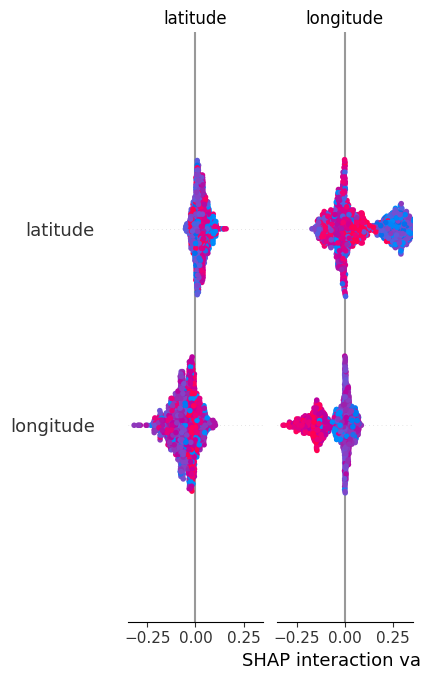

AttributeError: module 'shap' has no attribute 'plot'

In [ ]:
import shap
explainer = shap.TreeExplainer(grid_search.best_estimator_)
shap_values = explainer.shap_values(X_test)
# Summary plot feture imp
shap.summary_plot(shap_values, X_test)



XGBOOST_val_confusion_matrix.png saved!
XGBOOST_val_classification_report.png saved!
XGBOOST_test_confusion_matrix.png saved!
XGBOOST_test_classification_report.png saved!


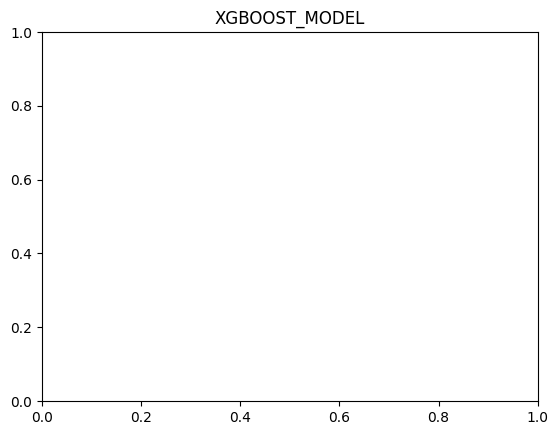

In [100]:

import seaborn as sns


def save_confusion_matrix(y_true, y_pred, title, filename):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    plt.title("XGBOOST_MODEL")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.savefig(filename)
    plt.close()
    print(f"{filename} saved!")

def save_classification_report(y_true, y_pred, title, filename):
    plt.title("XGBOOST_MODEL")
    report = classification_report(y_true, y_pred)
    plt.figure(figsize=(8,6))
    plt.text(0, 1, f"{title}\n\n{report}", fontsize=12, fontfamily='monospace')
    plt.axis('off')
    plt.savefig(filename)
    plt.close()
    print(f"{filename} saved!")


save_confusion_matrix(y_val, y_val_pred, "Validation Confusion Matrix", "XGBOOST_val_confusion_matrix.png")
save_classification_report(y_val, y_val_pred, "Validation Classification Report", "XGBOOST_val_classification_report.png")


save_confusion_matrix(y_test, y_test_pred, "Test Confusion Matrix", "XGBOOST_test_confusion_matrix.png")
save_classification_report(y_test, y_test_pred, "Test Classification Report", "XGBOOST_test_classification_report.png")
